In [1]:
# IMPORTING REQUIRED LIBRARIES

import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle

In [2]:
# READING words.txt - CREATING A WORDLIST (unclean) - SHUFFLING THE LIST

base_path = "./data"
wordlist = []

wordfile = open(base_path + "/words.txt", "r")
words = wordfile.readlines()

for line in words:
    if (line[0] == "#"):
        continue
    if (line.split(" ")[1] != "err"):
        wordlist.append(line)

print("Amount of data: ", len(wordlist))

np.random.shuffle(wordlist)

Amount of data:  96456


In [3]:
# DISPLAYING FIRST 5 ENTRIES OF THE WORDLIST

print(wordlist[0:5])

['l07-085-01-06 ok 168 1493 914 8 11 . .\n', 'g06-026b-08-04 ok 162 1515 2155 6 10 . .\n', 'b06-068-03-03 ok 203 1306 1291 354 84 VB improve\n', 'g06-011b-07-09 ok 162 1957 1933 212 92 NP Rome\n', 'a02-062-05-05 ok 189 1543 1840 13 33 , ,\n']


In [4]:
# SPLITING THE DATA - 90% TRAINING - 5% VALIDATION - 5% TESTING

train_last_index = int(0.9 * len(wordlist))
training_data = wordlist[0:train_last_index]

testing_data = wordlist[train_last_index:len(wordlist)]

validation_last_index = int(0.5 * len(testing_data))
validation_data = testing_data[0:validation_last_index]

testing_data = testing_data[validation_last_index:len(wordlist)]

print("Number of training data: ", len(training_data))
print("Number of validation data: ", len(validation_data))
print("Number of testing data: ", len(testing_data))

Number of training data:  86810
Number of validation data:  4823
Number of testing data:  4823


In [5]:
# FUNCTION TO CREATE LIST OF IMAGE PATHS AND LABELS

image_base_path = os.path.join(base_path, "words")

def image_path_and_label_generation(data):
    image_path_list = []
    path_label_list = []

    # PATH PATTERN => image_base_path/folder/subfolder/image.png
    for (i, line) in enumerate(data):
        line_split = line.strip()
        line_split = line.split(" ")

        name = line_split[0]
        folder = name.split("-")[0]
        subfolder = name.split("-")[1]

        image_path = os.path.join(image_base_path, folder, folder + "-" + subfolder, name + ".png")
        
        if (os.path.getsize(image_path)):
            image_path_list.append(image_path)
            path_label_list.append(line.split("\n")[0])

    return image_path_list, path_label_list

In [6]:
# CREATING IMAGE PATH LIST AND LABEL LIST FOR TRAINING, VALIDATION, AND TESTING DATA

training_image_paths, training_labels = image_path_and_label_generation(training_data)
validation_image_paths, validation_labels = image_path_and_label_generation(validation_data)
testing_image_paths, testing_labels = image_path_and_label_generation(testing_data)

print("Some training image paths: ", training_image_paths[0:5])
print("Training labels for above paths: ", training_labels[0:5])

print("\nSome validation image paths: ", validation_image_paths[0:5])
print("Validation labels for above paths: ", validation_labels[0:5])

print("\nSome testing image paths: ", testing_image_paths[0:5])
print("Testing labels for above paths: ", testing_labels[0:5])

Some training image paths:  ['./data\\words\\l07\\l07-085\\l07-085-01-06.png', './data\\words\\g06\\g06-026b\\g06-026b-08-04.png', './data\\words\\b06\\b06-068\\b06-068-03-03.png', './data\\words\\g06\\g06-011b\\g06-011b-07-09.png', './data\\words\\a02\\a02-062\\a02-062-05-05.png']
Training labels for above paths:  ['l07-085-01-06 ok 168 1493 914 8 11 . .', 'g06-026b-08-04 ok 162 1515 2155 6 10 . .', 'b06-068-03-03 ok 203 1306 1291 354 84 VB improve', 'g06-011b-07-09 ok 162 1957 1933 212 92 NP Rome', 'a02-062-05-05 ok 189 1543 1840 13 33 , ,']

Some validation image paths:  ['./data\\words\\e04\\e04-000\\e04-000-06-07.png', './data\\words\\b01\\b01-009\\b01-009-05-08.png', './data\\words\\a01\\a01-058u\\a01-058u-07-00.png', './data\\words\\m02\\m02-072\\m02-072-04-09.png', './data\\words\\f07\\f07-000\\f07-000-03-01.png']
Validation labels for above paths:  ['e04-000-06-07 ok 182 1669 1857 154 50 VB work', 'b01-009-05-08 ok 182 1758 1664 87 61 PP$ his', 'a01-058u-07-00 ok 169 344 2013 

In [7]:
# BUILDING VOCABULARY FOR LABELS AND SETTING MAX. LABEL LENGTH

characters = {'*', ',', '#', 'i', '^', 'y', '"', '=', 'P', '!', '@', 'A', 'F', 'Z', '/', 'M', 'R', 'W', 'U', 'v', '?', 'z', 'K', 'c', '\\', '}', 'o', '4', '&', '0', 'J', 'n', 'f', 'Y', 'l', '3', 'C', 'a', 'd', '(', 'N', '+', 'x', ';', '[', 'E', 'm', 'Q', ')', 'D', ']', '2', 'p', "'", '|', '5', '7', '>', '1', 'S', '$', 'b', 'q', '_', '%', 'X', 'g', '~', 'O', 'w', 'u', ':', '8', '{', '-', '6', '.', '<', 'j', 'L', 'B', 'T', '9', 'h', 'r', 't', 'G', 'I', 'e', 'V', 'H', 'k', 's'}
max_length = 30

print("Max. length: ", max_length)
print("Vocabulary size: ", len(characters))
print("Vocabulary: ", characters)

Max. length:  30
Vocabulary size:  93
Vocabulary:  {'E', 'B', 'o', 'n', 'I', '$', '4', '"', 'C', '_', '\\', '8', '#', 'l', 'O', 'c', '}', ',', 'Q', 'P', '3', '=', '0', 'q', '+', 'M', '(', 'm', 'b', "'", '2', 's', 'Z', 'T', '?', 'p', '*', '.', 'J', '9', 'z', '/', 'h', '^', 'v', ':', 'j', '1', '%', 'W', 'A', '|', 'K', 'f', 'a', 'N', '6', 'H', '~', 'x', 'R', ']', 'y', 'X', '[', 'r', 'i', 'L', 'D', '7', '&', 'G', 'u', 'Y', '5', 't', '@', '!', '>', 'V', 'w', ')', 'd', '-', ';', 'g', '<', 'e', 'S', 'F', '{', 'U', 'k'}


In [8]:
# FUNCTION TO CLEAN LABELS / EXTRACT LABELS - CREATING CLEAN LABELS FOR TRAINING, VALIDATION, AND TESTING DATA

def label_cleaning(labels):
    cleaned_labels = []

    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)

    return cleaned_labels

training_labels_clean = label_cleaning(training_labels)
validation_labels_clean = label_cleaning(validation_labels)
testing_labels_clean = label_cleaning(testing_labels)

print("Some cleaned training labels: ", training_labels_clean[0:5])
print("Some cleaned validation labels: ", validation_labels_clean[0:5])
print("Some cleaned testing labels: ", testing_labels_clean[0:5])

Some cleaned training labels:  ['.', '.', 'improve', 'Rome', ',']
Some cleaned validation labels:  ['work', 'his', 'did', 'in', 'would']
Some cleaned testing labels:  ['I', ',', 'retirement', 'the', 'We']


In [9]:
# MAPPING CHARACTERS TO INTEGER INDICES

AUTOTUNE = tf.data.AUTOTUNE

char_to_num = tf.keras.layers.StringLookup(vocabulary=list(characters), mask_token=None)
print("Character encoding: ", char_to_num)
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)
print("Inverse of character encoding: ", num_to_char)

Character encoding:  <keras.layers.preprocessing.string_lookup.StringLookup object at 0x000002BB62B0E0D0>
Inverse of character encoding:  <keras.layers.preprocessing.string_lookup.StringLookup object at 0x000002BB63023350>


In [10]:
# FUNCTION TO ADD PADDING AND MAKE IMAGES OF DIMENSION (W=128, H=64)

def image_resizing(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    if (pad_height % 2 != 0):
        height = pad_height // 2
        pad_height_top, pad_height_bottom = height + 1, height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if (pad_width % 2 != 0):
        width = pad_width // 2
        pad_width_left, pad_width_right = width + 1, width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(image, paddings=[[pad_height_top, pad_height_bottom], [pad_width_left, pad_width_right], [0, 0]])
    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)

    return image

In [11]:
# FUNCTION TO PRE-PROCESS IMAGES, VECTORIZE LABELS AND PREPARE THE DATASET FOR TENSORFLOW DATA PIPELINE

batch_size = 64
padding_token = 100
image_width = 128
image_height = 64

def image_preprocessing(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = image_resizing(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    
    return image

def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_length - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    
    return label

def process_images_labels(image_path, label):
    image = image_preprocessing(image_path)
    label = vectorize_label(label)
    
    return {"image": image, "label": label}

def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(process_images_labels, num_parallel_calls=AUTOTUNE)

    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [12]:
# PREPARING TRAINING, VALIDATION, AND TESTING DATASET

training_dataset = prepare_dataset(training_image_paths, training_labels_clean)
validation_dataset = prepare_dataset(validation_image_paths, validation_labels_clean)
testing_dataset = prepare_dataset(testing_image_paths, testing_labels_clean)

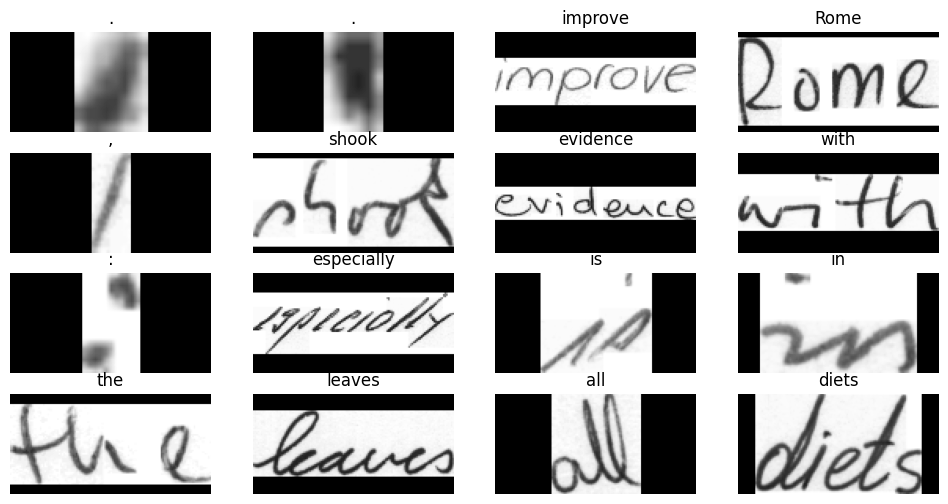

In [13]:
# VISUALIZATION OF SOME TRAINING SAMPLES

for data in training_dataset.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(12, 6))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))

        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [14]:
# CREATING CUSTOM CTCLayer - FUNCTION FOR MODEL BUILDING

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        return y_pred
    
    def get_config(self):
        config = super(CTCLayer, self).get_config()
        config.update({"loss_fn": self.loss_fn})
        
        return config


def build_model():
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    x = keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="conv1")(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    x = keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="conv2")(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)

    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Dense(128, activation="relu", name="dense2")(x)
    x = keras.layers.Dropout(0.1)(x)

    x = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True, dropout=0.2))(x)
    x = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True, dropout=0.2))(x)

    x = keras.layers.Dense(len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense3")(x)

    ctclayer = CTCLayer(name="ctc_loss")
    output = ctclayer(labels, x)

    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="HTR")
    opt = keras.optimizers.Adam()
    
    model.compile(optimizer=opt)
    
    return model


model = build_model()
model.summary()

Model: "HTR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 64, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 64, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 32, 32)   0           ['conv1[0][0]']                  
                                                                                                  
 conv2 (Conv2D)                 (None, 64, 32, 64)   18496       ['pool1[0][0]']                

In [15]:
# EXTRACTING IMAGES AND LABELS FROM VALIDATION DATASET

validation_images = []
validation_labels = []

for batch in validation_dataset:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [16]:
# MODEL BUILDING - MODEL TRAINING

epochs = 80

model = build_model()
prediction_model = keras.models.Model(model.get_layer(name="image").input, model.get_layer(name="dense3").output)

history = model.fit(training_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/80
1357/1357 [==============================] - 596s 430ms/step - loss: 13.4705 - val_loss: 11.7574
Epoch 2/80
1357/1357 [==============================] - 546s 402ms/step - loss: 10.5647 - val_loss: 9.5661
Epoch 3/80
1357/1357 [==============================] - 582s 429ms/step - loss: 8.7893 - val_loss: 7.6626
Epoch 4/80
1357/1357 [==============================] - 692s 510ms/step - loss: 6.9388 - val_loss: 5.4319
Epoch 5/80
1357/1357 [==============================] - 611s 450ms/step - loss: 5.2742 - val_loss: 4.1502
Epoch 6/80
1357/1357 [==============================] - 646s 476ms/step - loss: 4.3166 - val_loss: 3.4533
Epoch 7/80
1357/1357 [==============================] - 605s 446ms/step - loss: 3.7399 - val_loss: 3.1401
Epoch 8/80
1357/1357 [==============================] - 518s 382ms/step - loss: 3.3582 - val_loss: 2.8411
Epoch 9/80
1357/1357 [==============================] - 638s 471ms/step - loss: 3.0650 - val_loss: 2.5629
Epoch 10/80
1357/1357 [====================

In [17]:
# FUNCTION FOR DECODING THE LABEL PREDICTIONS

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]

    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_length]

    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    
    return output_text

2/2 [==============================] - 1s 50ms/step


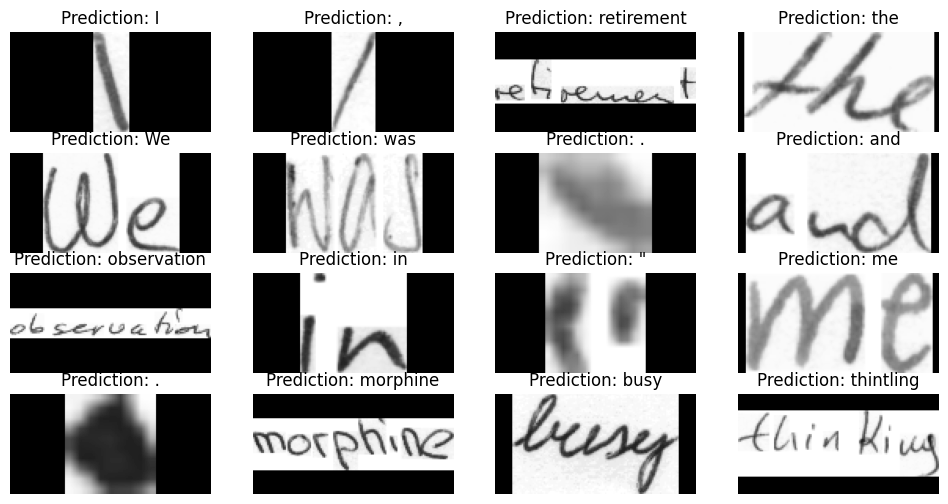

In [18]:
# PREDICTIONS ON VALIDATION DATA - VISUALISATION OF VALIDATION PREDICTIONS

for batch in testing_dataset.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(12, 6))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()

In [ ]:
# SAVING MODEL AND TRAINED WEIGHTS

pickle.dump(prediction_model, open("./models/pickle_model.pkl", "wb"))
prediction_model.save_weights("./models/h5_model_weights.h5")

prediction_model.save("./models/combined_h5_model.h5")

In [1]:
# LOADING SAVED MODEL AND WEIGHTS

prediction_model1 = pickle.load(open("./models/pickle_model.pkl", "rb"))
prediction_model1.load_weights("./models/h5_model_weights.h5")
prediction_model1.compile()

In [21]:
# SUMMARY OF LOADED MODEL

prediction_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 128, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 128, 64, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 32, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 64, 32, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 32, 16, 64)        0         
                                                                 
 reshape (Reshape)           (None, 32, 1024)          0         
                                                                 
 dense1 (Dense)              (None, 32, 64)            65600 

In [22]:
# TESTING LOADED MODEL ON A IMAGE

image = image_preprocessing("./testimage/image.png")
image = np.expand_dims(image, axis=0)

pred = decode_batch_predictions(prediction_model1.predict(image))

print(pred[0])

# ---------------------------------------------------------------

image = image_preprocessing("./testimage/image1.png")
image = np.expand_dims(image, axis=0)

pred = decode_batch_predictions(prediction_model1.predict(image))

print(pred[0])

# ---------------------------------------------------------------

image = image_preprocessing("./testimage/image2.png")
image = np.expand_dims(image, axis=0)

pred = decode_batch_predictions(prediction_model1.predict(image))

print(pred[0])

1/1 [==============================] - 1s 1s/step
and
1/1 [==============================] - 0s 27ms/step
said
1/1 [==============================] - 0s 27ms/step
him
